In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Đọc dữ liệu từ file train_data, hiển thị thông tin cần thiết.

In [2]:
dataTrain_titanic = pd.read_csv('D:/Hocmay/Titanic_ML_From_Disaster/Titanic_Project_Information_Data/train.csv')
dataTrain_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataTrain_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Convert cột PassengerId của Data Train thành cột index trong DataFrame.

In [4]:
dataTrain_titanic.set_index('PassengerId', inplace=True)
dataTrain_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ở file train_data, xuất hiện cột "Survived" là cột cần dự đoán, còn ở file test_data, không có cột "Survived".

In [5]:
dataTest_titanic = pd.read_csv('D:/Hocmay/Titanic_ML_From_Disaster/Titanic_Project_Information_Data/test.csv')
dataTest_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
dataTest_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Convert cột PassengerId của Data Test thành cột index trong DataFrame.

In [7]:
dataTest_titanic.set_index('PassengerId', inplace=True)
dataTest_titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Tạo ra 1 bảng thống kê tóm tắt các cột số trong dataframe. Bảng thống kê này bao gồm các thông tin sau:
- count: số lượng giá trị không bị thiếu
- mean: giá trị trung bình
- std: độ lệch chuẩn
- min: giá trị nhỏ nhất
- 25%: phần centile 25
- 50%: phần centile 50
- 75%: phần centile 75
- max: giá trị lớn nhất

[4]:    
**SibSp** ranges from 0 to 8, so it is divided into the following stages:
- Group 1: SibSp = 0
- Group 2: SibSp = 1
- Group 3: SibSp = 2
- Group 4: SibSp = 3
- Group 5: SibSp = 4
- Group 6: SibSp = 5
- Group 7: SibSp = 8

In the training data, SibSp values of 6 and 7 do not appear, so they will not be considered, and the maximum value displayed is 8.

**Parch** ranges from 0 to 6, so it is divided into the following stages:
- Group 1: Parch = 0
- Group 2: Parch = 1
- Group 3: Parch = 2
- Group 4: Parch = 3
- Group 5: Parch = 4
- Group 6: Parch = 5
- Group 7: Parch = 6

In the training data, Parch values greater than 6 do not appear, so they will not be considered, and the maximum value displayed is 6.


In [8]:
dataTrain_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Display the correlation heatmap for the groups above.

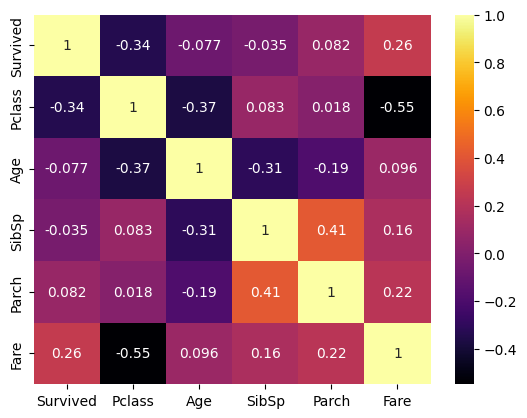

In [9]:
import seaborn as sns

sns.heatmap(dataTrain_titanic.corr(numeric_only=True), cmap="inferno", annot=True)
plt.show()

Because the new version of the Seaborn library no longer supports writing `sns.heatmap(dataTrain_titanic.corr(), cmap="inferno", annot=True)` in this way in the `sns.heatmap` function, the solution is to pass a boolean parameter into the `heatmap` function, `sns.heatmap(dataTrain_titanic.corr(numeric_only=True), cmap="inferno", annot=True)`. If `True`, the value will be displayed on the heatmap, and if `False`, the value will not be displayed. https://seaborn.pydata.org/generated/seaborn.heatmap.html

Method "stratified random split of training data" đảm bảo rằng mỗi tập con của dữ liệu huấn luyện (sau khi chia) có sự phân bổ tương tự như tổng thể dữ liệu ban đầu đối với một số đặc tính nhất định (ví dụ: tỷ lệ của các phòng).

Sử dụng 80% dữ liệu để huấn luyện và 20% dữ liệu để kiểm tra.

In [10]:
dataTrain_titanic = dataTrain_titanic.reset_index(drop=True)

Reset lại chỉ số của DataFrame dataTrain_titanic trước khi chia dữ liệu, để các chỉ số của DataFrame là liên tục và bắt đầu từ 0.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(dataTrain_titanic, dataTrain_titanic[["Survived", "Pclass", "Sex"]]):
    strat_train_set = dataTrain_titanic.loc[train_indices]
    strat_test_set = dataTrain_titanic.loc[test_indices]

In [12]:
strat_test_set

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
344,0,2,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.0000,NaN,S
424,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S
431,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
429,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
767,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
221,0,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S
774,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S
626,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q


Vẽ biểu đồ Histogram của các nhóm trên dữ liệu huấn luyện và dữ liệu kiểm tra.


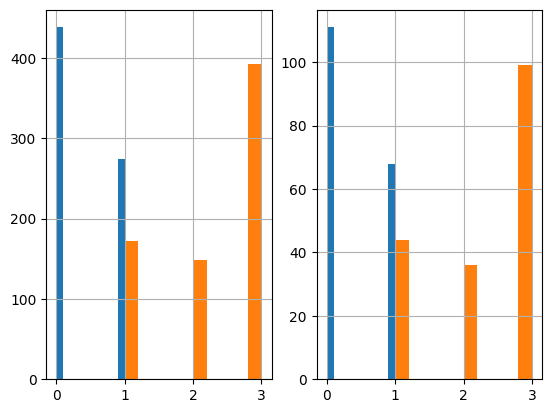

In [13]:
plt.subplot(1, 2, 1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1, 2, 2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

Tạo ra 4 biểu đồ histogram để so sánh phân phối các cột Survived, Pclass giữa dữ liệu huấn luyện và dữ liệu kiểm tra.

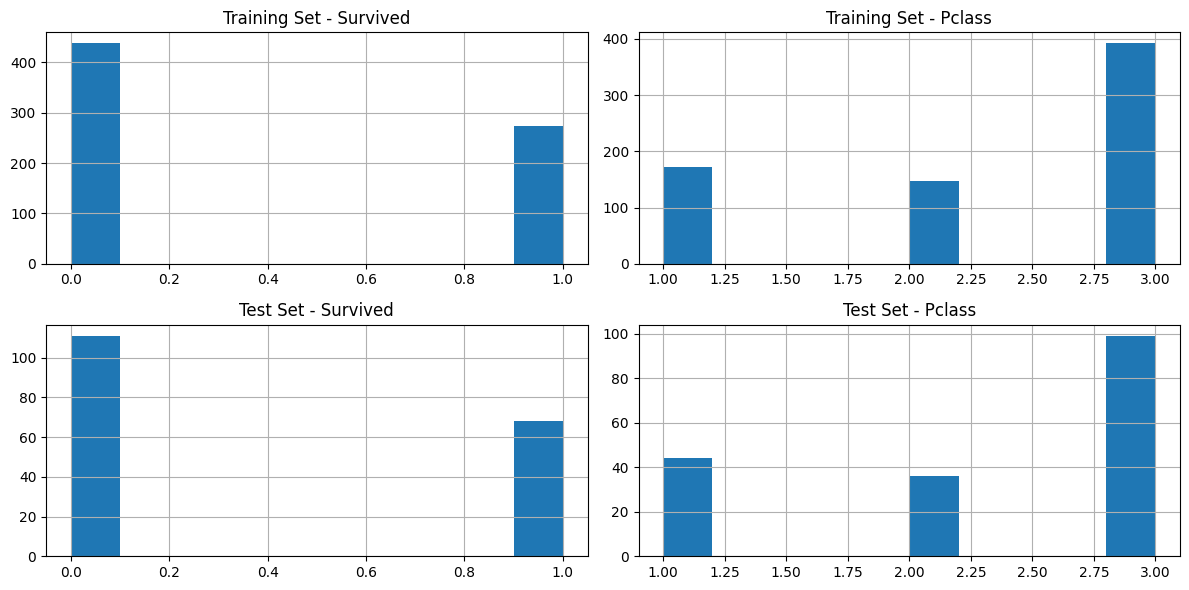

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
strat_train_set["Survived"].hist()
plt.title("Training Set - Survived")

plt.subplot(2, 2, 2)
strat_train_set["Pclass"].hist()
plt.title("Training Set - Pclass")

plt.subplot(2, 2, 3)
strat_test_set["Survived"].hist()
plt.title("Test Set - Survived")

plt.subplot(2, 2, 4)
strat_test_set["Pclass"].hist()
plt.title("Test Set - Pclass")

plt.tight_layout()
plt.show()

Phân ra categorical và numerical features để nhận biết kiểu dữ liệu phục vụ cho việc xử lý giá trị bị thiếu và huấn luyện mô hình.

Categorical Features - Đặc điểm phân loại:
- nominal: không có thứ tự, không thể so sánh với nhau.
- ordinal: có thứ tự, có thể so sánh với nhau.
- ratio: có thứ tự, có thể so sánh với nhau, có giá trị 0.
- interval: có thứ tự, có thể so sánh với nhau, không có giá trị 0.

Numerical Features - Đặc điểm số:
- discrete: giá trị rời rạc.
- continuous: giá trị liên tục.
- time-series: giá trị thời gian.

In [15]:
dataTrain_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Kết quả cho thấy: tập dữ liệu huấn luyện ban đầu có 891 mẫu, ứng với index = 891 entries đại diện cho mỗi hành khách.Data columns (total 12 columns): có 12 cột dữ liệu, chi tiết như sau:
- Survived: sống sót hay không.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: int64 (kiểu dữ liệu số nguyên).
  - unique: 2 (có 2 giá trị duy nhất).
- Pclass: hạng ghế.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: int64 (kiểu dữ liệu số nguyên).
  - unique: 3 (có 3 giá trị duy nhất).
- Name: tên hành khách.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: object (kiểu dữ liệu chuỗi).
- Sex: giới tính.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: object (kiểu dữ liệu chuỗi).
  - unique: 2 (có 2 giá trị duy nhất).
- Age: tuổi.
  - non-null: 714 (có 177 giá trị bị thiếu).
  - data type: float64 (kiểu dữ liệu số thực).
  - mean: 29.7 (giá trị trung bình).
- SibSp: số lượng anh chị em hoặc vợ chồng đi cùng.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: int64 (kiểu dữ liệu số nguyên).
  - unique: 7 (có 7 giá trị duy nhất).
- Parch: số lượng cha mẹ hoặc con cái đi cùng.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: int64 (kiểu dữ liệu số nguyên).
  - unique: 7 (có 7 giá trị duy nhất).
- Ticket: số vé.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: object (kiểu dữ liệu chuỗi).
- Fare: giá vé.
  - non-null: 891 (không có giá trị bị thiếu).
  - data type: float64 (kiểu dữ liệu số thực).
  - mean: 32.2 (giá trị trung bình).
- Cabin: số phòng.
  - non-null: 204 (có 687 giá trị bị thiếu).
  - data type: object (kiểu dữ liệu chuỗi).
Embarked: cảng lên tàu.
  - non-null: 889 (có 2 giá trị bị thiếu).
  - data type: object (kiểu dữ liệu chuỗi).
  - unique: 3 (có 3 giá trị duy nhất). 

Age, Cabin, Embarked là 3 giá trị bị missing value -> cần xử lý missing value.

Giải thích loại Data Type của các mục dữ liệu:
- Survived có 2 giá trị duy nhất là 0 và 1:
  - 0: không sống sót.
  - 1: sống sót.
  - Nên Survived là kiểu dữ liệu số nguyên.
- Pclass có 3 giá trị duy nhất là 1, 2 và 3:
  - 1: phòng hạng 1.
  - 2: phòng hạng 2.
  - 3: phòng hạng 3.
  - Nên Pclass là kiểu dữ liệu số nguyên.
- Name là chuỗi ký tự, không thể so sánh
  - Nên Name là kiểu dữ liệu chuỗi.
- Sex có 2 giá trị duy nhất:
  - male: giới tính nam.
  - female: giới tính nữ.
  - Nên Sex là kiểu dữ liệu chuỗi.
- Age là số thực, có giá trị trung bình là 29.7.
  - Nên Age là kiểu dữ liệu số thực.
- SibSp có 7 giá trị (1 ace/vochong, 2 ace/vochong,... 8 ace/vochong):
  - Nên SibSp là kiểu dữ liệu số nguyên.
- Parch có 7 giá trị (1 con, 2 con,... 6 con):
  - Nên Parch là kiểu dữ liệu số nguyên.
- Ticket là chuỗi ký tự, không thể so sánh
  - Nên Ticket là kiểu dữ liệu chuỗi.
- Fare là giá vé tàu:
  - Nên Fare là kiểu dữ liệu số thực.
- Cabin là chuỗi ký tự, không thể so sánh
  - Nên Cabin là kiểu dữ liệu chuỗi.
- Embarked có 3 giá trị duy nhất là S, C và Q:
  - S: Southampton.
  - C: Cherbourg.
  - Q: Queenstown.
  - Nên Embarked là kiểu dữ liệu chuỗi.

In [16]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 321 to 849
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       568 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Cabin     164 non-null    object 
 10  Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


Kết quả cho thấy: tập dữ liệu train có
Index: 712 hàng, mỗi hàng đại diện cho một hành khách trên tàu Titanic.
Data columns (total 12 columns): có 12 cột dữ liệu, chi tiêt như sau:
- PassengerId: số thứ tự hành khách.
  - non-null: 712 (không có giá trị thiếu)
  - dtype: int64 (kiểu dữ liệu là số nguyên)
- Survived: số người sống sót
  - non-null: 712 (không có giá trị thiếu)
  - dtype: int64 (kiểu dữ liệu là số nguyên)
- Pclass: hạng vé
  - non-null: 712 (không có giá trị thiếu)
  - dtype: int64 (kiểu dữ liệu là số nguyên)
- Name: tên hành khách
  - non-null: 712 (không có giá trị thiếu)
  - dtype: object (kiểu dữ liệu là chuỗi)
- Sex: giới tính
  - non-null: 712 (không có giá trị thiếu)
  - dtype: object (kiểu dữ liệu là chuỗi)
- Age: tuổi
  - non-null: 568 (có giá trị thiếu)
  - dtype: float64 (kiểu dữ liệu là số thực)
  - note: data train có tổng cộng 712 hành khách, trong đó có 568 hành khách có thông tin về tuổi và 144 hành khách không có thông tin về tuổi.
- SibSp: số lượng anh chị em hoặc vợ chồng đi cùng
  - non-null: 712 (không có giá trị thiếu)
  - dtype: int64 (kiểu dữ liệu là số nguyên)
- Parch: số lượng bố mẹ hoặc con cái đi cùng
  - non-null: 712 (không có giá trị thiếu)
  - dtype: int64 (kiểu dữ liệu là số nguyên)
- Ticket: số vé
  - non-null: 712 (không có giá trị thiếu)
  - dtype: object (kiểu dữ liệu là chuỗi)
- Fare: giá vé
  - non-null: 712 (không có giá trị thiếu)
  - dtype: float64 (kiểu dữ liệu là số thực)
- Cabin: số phòng
  - non-null: 161 (có giá trị thiếu)
  - dtype: object (kiểu dữ liệu là chuỗi)
  - note: data train có tổng cộng 712 hành khách, trong đó có 161 hành khách có thông tin về số phòng và 551 hành khách không có thông tin về số phòng.
- Embarked: cảng lên tàu
  - non-null: 710 (có giá trị thiếu)
  - dtype: object (kiểu dữ liệu là chuỗi)
  - note: data train có tổng cộng 712 hành khách, trong đó có 710 hành khách có thông tin về cảng lên tàu và 2 hành khách không có thông tin về cảng lên tàu.

In [18]:
dataTest_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


Categorical: Survived, Sex, Embarked, Pclass(ordinal), SibSp, Parch
Numerical(continuous): Age, Fare
Mix types of data: Ticket, Cabin
Contain errors or typos: Name
Blank, null or empty values: Age > Cabin > Embarked
Various Data Types: float64, int64, object(String)

In [19]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 344 to 650
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Name      179 non-null    object 
 3   Sex       179 non-null    object 
 4   Age       146 non-null    float64
 5   SibSp     179 non-null    int64  
 6   Parch     179 non-null    int64  
 7   Ticket    179 non-null    object 
 8   Fare      179 non-null    float64
 9   Cabin     40 non-null     object 
 10  Embarked  179 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


Ước lượng tỷ lệ sống sót trên tàu Titanic.

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin